## Compare portfolio theories
Here we use shares price history to compare various portfolio allocation theories.
Main idea is to compare different ways to get portfolio:
  * Markovitz optimal portfolio (max Sharpie portfolio)
  * Using Ledoit Wolf caovariance shrinkage
  * Minimal volatility portfolio
  * Market capitalization-weighted portfolio
  * Hierarchical Risk Parity

import necessary libs

In [1]:
import numpy as np
import tqdm
import pandas as pd
import datetime
import importlib

In [2]:
from pypoanal import portfolio_calculators
from pypoanal import dataloader
from pypoanal import backtester

Use plotly backend for drawing charts

In [3]:
%matplotlib widget
pd.options.plotting.backend = "plotly"

## Load the data

Randomly select 50 tickers from ``info/shares_outstanding.csv`` file

In [4]:
tickers_list = np.array(dataloader.load_random_saved_tickers(sample_size=400))
tickers_list

array(['RHP', 'BIVI', 'ALEX', 'HOPE', 'GATE', 'CTLT', 'VINC', 'APRE',
       'TCDA', 'ATEN', 'TNC', 'FFA', 'MASI', 'PIII', 'RYAAY', 'DOOO',
       'VINO', 'BSY', 'AWK', 'NATR', 'HL', 'UROY', 'GWGH', 'SHW', 'FGB',
       'CTXR', 'RELL', 'SMH', 'RYI', 'BRFH', 'REVH', 'MXE', 'VMC', 'ROSE',
       'MIDD', 'IMRA', 'BERY', 'EAR', 'KPRX', 'KRA', 'NISN', 'HTLF',
       'RGF', 'LION', 'TLIS', 'HYT', 'STZ', 'MFG', 'SFL', 'EXG', 'MNDY',
       'MRSN', 'PGRE', 'LPSN', 'CLFD', 'SRAD', 'MIRM', 'GNRC', 'RPAY',
       'AAC', 'AGYS', 'BGY', 'WRLD', 'ICD', 'BTTX', 'GOGO', 'VPG', 'EYE',
       'ZCMD', 'FRSG', 'CAS', 'CHKR', 'SCOR', 'MOXC', 'NTAP', 'GTH',
       'FLL', 'WDAY', 'RDNT', 'MCRI', 'PPL', 'OCUP', 'PRPL', 'ADXN', 'XP',
       'FBP', 'ASC', 'OXBRW', 'VHI', 'PKOH', 'EZPW', 'FCRD', 'MYD',
       'DECK', 'EVOP', 'VSTA', 'RCON', 'MUDSU', 'FLS', 'NBTB', 'BRID',
       'PIRS', 'JBT', 'TEN', 'IGIC', 'ORA', 'OPI', 'LFC', 'WBS', 'ABVC',
       'CCOI', 'TTM', 'SIDU', 'RCEL', 'FCN', 'COST', 'BLIN', 'AGBA',


Load price and volume history for selected tickers

In [5]:
shares_history = dataloader.load_shares_history(tickers_list)

Loading price and volume: 100%|███████████████████████████████████████████████████████████████████████████| 400/400 [00:59<00:00,  6.67it/s]


## Backtest Performance

Select various ways to create a portfolio from given shares

In [6]:
calculators = {
    # 'max_sharpe': portfolio_calculators.compute_sharpie_weights,
    'HRP': portfolio_calculators.compute_hrp_weights,
    # 'exp_cov': portfolio_calculators.compute_expcov_weights,
    # 'equal': portfolio_calculators.compute_equal_weights,
    'MCAP': portfolio_calculators.compute_mcap_weights,
    'ledoitw_cov': portfolio_calculators.compute_ledoitw_weights
}

We allocate portfolio according to one of the algorithms. Then, portfolio is rebalanced every **rebalance_period** days (e.g. annually).
As a result we get history of allocated portfolios, fees, and portfolio values is USD.
All of that is done in **compare_calculators_for_periodic_rebalance** method.
Here *backtesting* means testing the trategy back in time (using hitorical data). 

In [7]:
backtest_start_date = datetime.date(2006, 8, 8)
backtest_end_date = datetime.date(2021, 12, 12)
rebalance_period = datetime.timedelta(days=360)
rebalance_dates = backtester.compute_rebalance_dates(backtest_start_date,backtest_end_date,rebalance_period)
importlib.reload(backtester)

values_history_per_calc, fees_history_per_calc, portfolio_history_per_calc = backtester.compare_calculators_for_periodic_rebalance(calculators,
                                                                                                                  tickers_list,
                                                                                                                  10**4,
                                                                                                                  rebalance_dates,
                                                                                                                  shares_history=shares_history)

HRP


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:18<00:00,  1.31s/it]


MCAP


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00,  8.45it/s]


ledoitw_cov


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:03<00:00,  4.15it/s]


How did the value of the annually rebalanced market-cap weighted portfolio value changed over time:

In [8]:
values_history_per_calc['MCAP'].head()

2006-08-08    10000.000000
2007-08-03     9996.188401
2008-07-28     7679.945309
2009-07-23     5717.071556
2010-07-18     6103.274555
Name: MCAP, dtype: float64

How did the rebalance fees of the annually rebalanced market-cap weighted portfolio value changed over time:

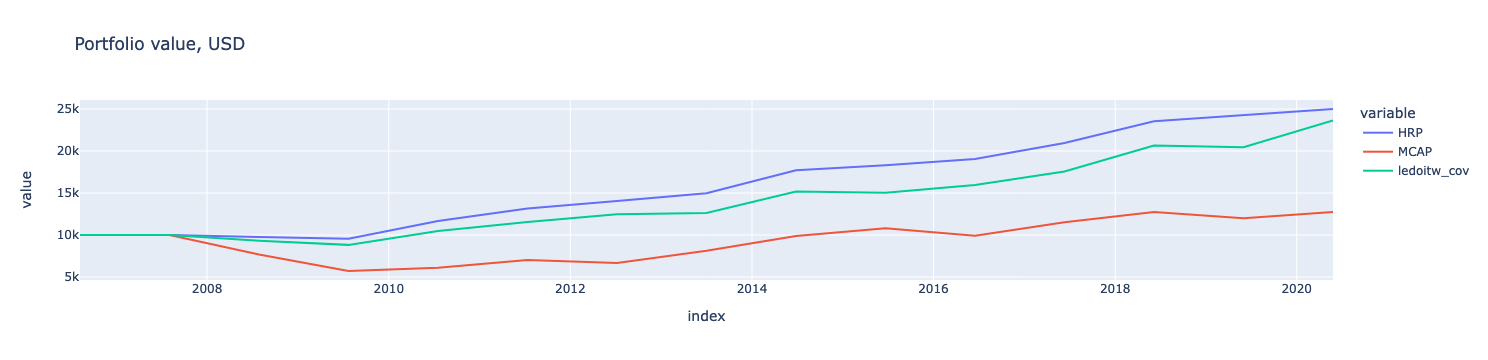

In [9]:
values_history_per_calc.plot(title=f'Portfolio value, USD')

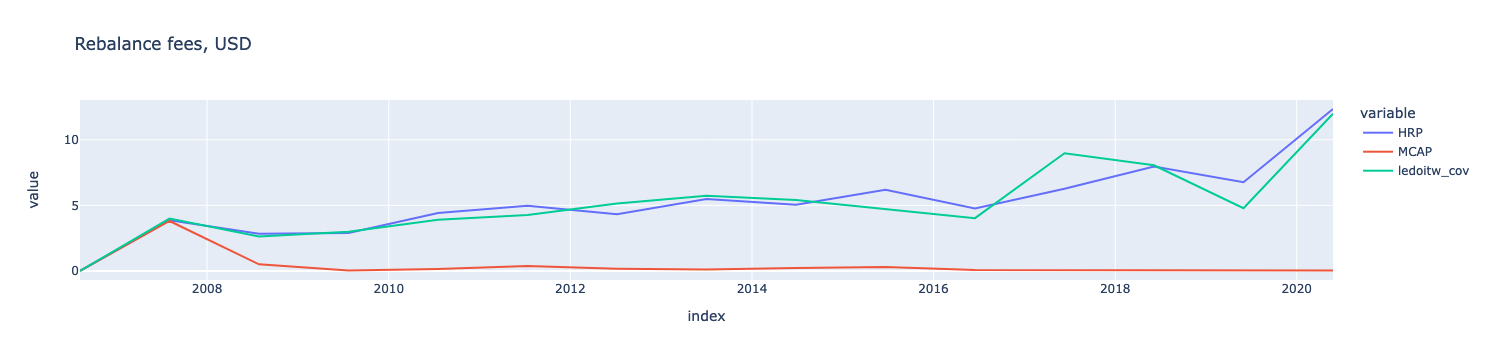

In [10]:
fees_history_per_calc.plot(title=f'Rebalance fees, USD')

##  Backtests varying start date
Now we can test how the date we start the backtest from affects the results

In [11]:
calculators = {
    # 'max_sharpe': portfolio_calculators.compute_sharpie_weights,
    'HRP': portfolio_calculators.compute_hrp_weights,
    # 'exp_cov': portfolio_calculators.compute_expcov_weights,
    # 'equal': portfolio_calculators.compute_equal_weights,
    'MCAP': portfolio_calculators.compute_mcap_weights,
    'ledoitw_cov': portfolio_calculators.compute_ledoitw_weights
}

In [12]:
from random import randint
importlib.reload(backtester)
backtest_start_date = datetime.date(2010, 8, 8)
backtest_end_date = datetime.date(2022, 2, 20)
rebalance_period = datetime.timedelta(days=360)
num_starting_dates = 40
initial_cash = 10 ** 7
start_days_delta = list(sorted(set(randint(-4*365, 4*365) for k in range(num_starting_dates))))
start_dates = [backtest_start_date+datetime.timedelta(days=days) for days in start_days_delta]
# start_dates = [datetime.date(2009,5,10)]
stats: dict[pd.DataFrame] = dict()
for calc_name, calculate_weights in calculators.items():
    start_to_end_values_df = pd.DataFrame()
    for start_date in tqdm.tqdm(start_dates,desc=calc_name,disable=False):
        rebalance_dates = backtester.compute_rebalance_dates(start_date,backtest_end_date,rebalance_period)
        portfolio_history, _ = backtester.reallocate_portfolio_periodically(calculate_weights,
                                                                            rebalance_dates,
                                                                            initial_cash,
                                                                            fees_percent=0.04,
                                                                            shares_history=shares_history,
                                                                            progress_bar=False)
        values_history: list[np.float64] = backtester.portfolios_values_history(list(zip(rebalance_dates,portfolio_history)),
                                                                                shares_history.price_history)
        values_history_dataframe = pd.DataFrame({str(start_date):values_history},index=rebalance_dates)
        start_to_end_values_df = start_to_end_values_df.join(values_history_dataframe,how='outer')
    stats[calc_name] = start_to_end_values_df

ledoitw_cov: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 39/39 [01:32<00:00,  2.37s/it]


In [13]:
stats.keys()

dict_keys(['HRP', 'MCAP', 'ledoitw_cov'])

stats is a dict of dataframes. Column of each dataframe correspond to start date, rows correspond to next reallocation date.

In [14]:
stats['ledoitw_cov'].head()

2006-11-06  2007-02-22  2007-06-23  2007-12-31  2008-01-13  \
2006-11-06  1.000000e+07         NaN         NaN         NaN         NaN   
2007-02-22           NaN  10000000.0         NaN         NaN         NaN   
2007-06-23           NaN         NaN  10000000.0         NaN         NaN   
2007-11-01  9.996002e+06         NaN         NaN         NaN         NaN   
2007-12-31           NaN         NaN         NaN  10000000.0         NaN   

            2008-02-27  2008-05-10  2008-07-30  2008-10-28  2008-11-02  ...  \
2006-11-06         NaN         NaN         NaN         NaN         NaN  ...   
2007-02-22         NaN         NaN         NaN         NaN         NaN  ...   
2007-06-23         NaN         NaN         NaN         NaN         NaN  ...   
2007-11-01         NaN         NaN         NaN         NaN         NaN  ...   
2007-12-31         NaN         NaN         NaN         NaN         NaN  ...   

            2012-07-08  2012-11-15  2013-01-23  2013-02-16  2013-02-22  \
2006-11-06         NaN         NaN         NaN         NaN         NaN   
2007-02-22         NaN         NaN         NaN         NaN         NaN   
2007-06-23         NaN         NaN         NaN         NaN         NaN   
2007-11-01         NaN         NaN         NaN         NaN         NaN   
2007-12-31         NaN         NaN         NaN         NaN         NaN   

            2013-08-15  2013-09-29  2014-06-17  2014-07-05  2014-07-17  
2006-11-06         NaN         NaN         NaN         NaN         NaN  
2007-02-22         NaN         NaN         NaN         NaN         NaN  
2007-06-23         NaN         NaN         NaN         NaN         NaN  
2007-11-01         NaN         NaN         NaN         NaN         NaN  
2007-12-31         NaN         NaN         NaN         NaN         NaN  

[5 rows x 39 columns]

Let's see the difference between MCAP and Ledoit Wolf min volatility. We normalize it by initial cash and consider % change

In [15]:
mcap_leddoit_diff = ((stats['ledoitw_cov']-stats['MCAP'])/initial_cash*100).interpolate()

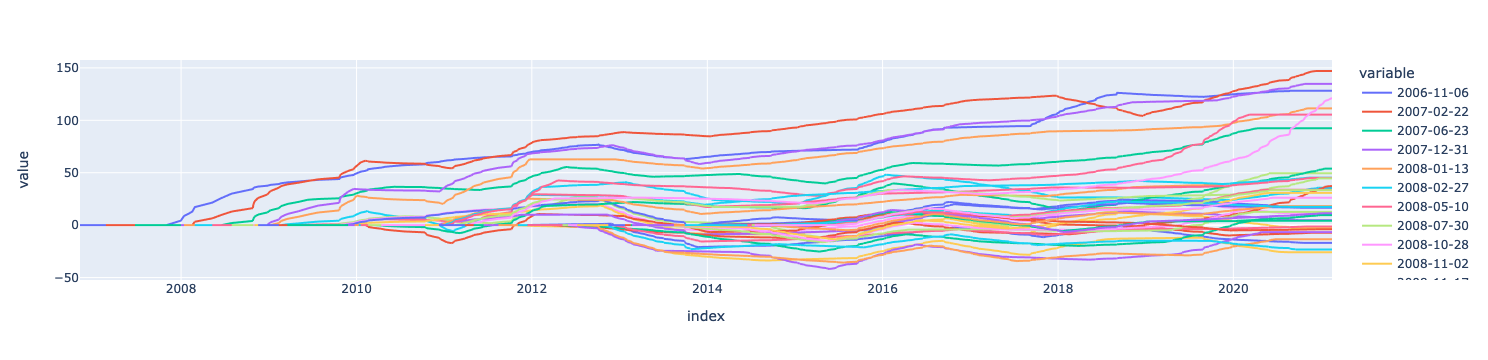

In [16]:
mcap_leddoit_diff.plot()

Comparing HRP results to marcet-cap weighted portfolios

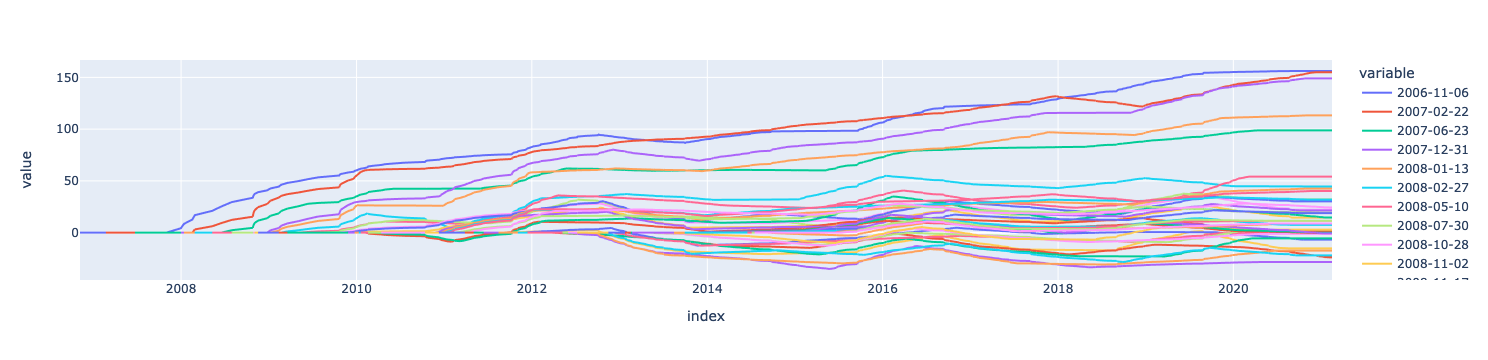

In [17]:
mcap_hrp_diff = ((stats['HRP']-stats['MCAP'])/initial_cash*100).interpolate()
mcap_hrp_diff.plot()

Note, that portolios bought before the 2008 financial crysis performed much better, yielding significantly higher returns.

Consider distribution of portfolio values compared to MCAP. Start date is randomized.

In [18]:
import plotly.express as px
mcap_diff = pd.DataFrame()
mcap_diff['ledoitw_cov'] = mcap_leddoit_diff.iloc[-1]
mcap_diff['HRP'] = mcap_hrp_diff.iloc[-1]

In [19]:
mcap_diff.describe()

ledoitw_cov         HRP
count    39.000000   39.000000
mean     34.863011   26.026152
std      45.712720   46.942205
min     -25.863759  -28.332082
25%       4.526027   -0.514201
50%      18.141856   11.432168
75%      45.196336   32.032909
max     147.025146  156.160386

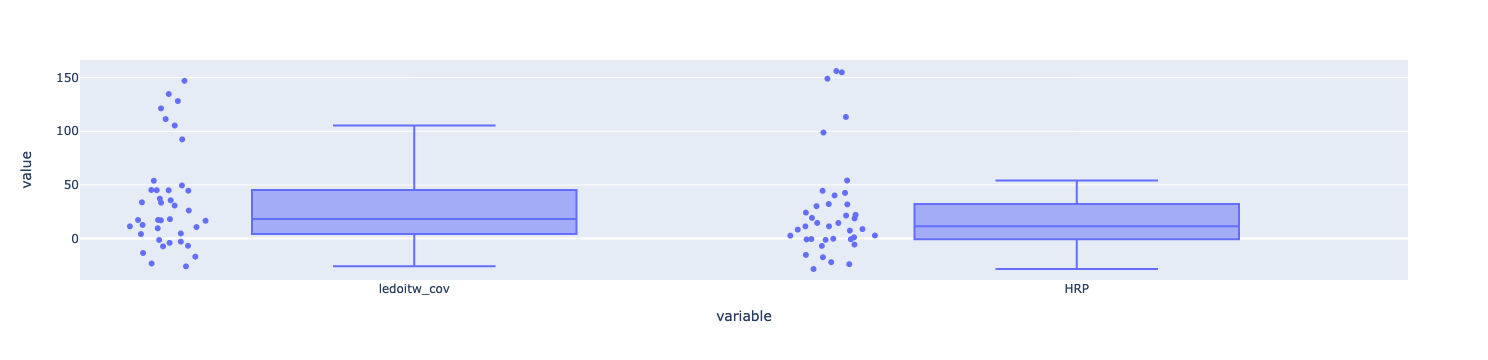

In [20]:
px.box(mcap_diff, y=['ledoitw_cov','HRP'], points='all')

both HRP and ledoit work better than MCAP-weighted portfolios. But which one works better?

Kolmogorov-Smirnov test for independent samples.

* $H_0$: equally distributed
* $H_1$: ledoit > HRP

Small $p$-values mean that we should probably reject $H_0$, and assume that min volatility portfolio using Ledoit Wolf convariance shrinkage is a better idea

In [39]:
st.ks_2samp(mcap_diff['ledoitw_cov'], mcap_diff['HRP'], alternative='two-sided')

KstestResult(statistic=0.20512820512820512, pvalue=0.3887659310628042)

Result: HRP works almost the same as Ledoit-Wolf min volatility